# Análisis de datos

En este notebook comparamos los diversos datasets así como se identificarán y trabajarán nuevos datasets para posibilitar este análisis

In [1]:
import warnings
warnings.filterwarnings("ignore")

Finalmente nuestras bases de datos son:

(pendiente)

Así mismo hay un par de tablas adicionales como son

- **paises**, que contiene información sobre cada país, región OMS, continente, ISO2, ISO3, etc.
- **WID**, que contiene información de 2018 a 2022 de algunos indicadores de desarrollo seleccionados por el equipo
- **temp**, que contiene datos sobre el clima global en 2013,si bien sería mejor tener datos más cercanos ha sido imposible encontrar un dataset similar con estas características puesto que muchos suelen tener registros por segundos (lo que nos resulta imposible de manejar por cuestiones informáticas) o por estaciones de control climático sin divisiones territoriales

En países hará falta agregar población y datos del clima, para simplificar podrían ser una media aritmética de entre 2020 y 2023

##### Funciones

In [2]:
import pycountry

def get_iso2(country_name):
    try:
        country = pycountry.countries.search_fuzzy(country_name)
        return country[0].alpha_2
    except LookupError:
        return None

#### Preparación del entorno de trabajo

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import IPython as display
import datetime as dt

In [4]:
# configurar los gráficos
sns.set_style('whitegrid')
sns.set_palette('mako')

## Tabla países

In [108]:
paises =  pd.read_csv("C:/Users/Patricia/Desktop/Github/TFM/DF Covid/paises_region_oms_v2.csv")

In [22]:
paises.columns

Index(['PAIS_ISO3', 'PAIS_ISO2', 'PAIS_NOM', 'COD_CONTINENTE', 'CONTINENTE',
       'OMS_REGION', 'DESC_OMS_REGION', 'PAIS_NOM_2'],
      dtype='object')

In [23]:
paises['COD_CONTINENTE'].fillna('Z9', inplace=True)

In [24]:
paises['COD_CONTINENTE'].unique()

array(['AF', 'AN', 'AS', 'EU', 'Z9', 'OC', 'SA'], dtype=object)

In [25]:
print(paises.loc[paises['COD_CONTINENTE'] == 'Z9','CONTINENTE'])

166     North America
167     North America
168     North America
169     North America
170            Europe
171     North America
172     North America
173     North America
174     North America
175     North America
176     North America
177     North America
178     North America
179     North America
180     North America
181     North America
182     North America
183     North America
184     North America
185     North America
186     North America
187     North America
188     North America
189     North America
190     North America
232    Sin determinar
233     North America
234     North America
235     North America
236     North America
237     North America
238     North America
239     North America
241     North America
242     North America
243     North America
244     North America
245     North America
246     North America
247     North America
248     North America
Name: CONTINENTE, dtype: object


In [26]:
# Agregamos los códigos faltantes
paises.loc[(paises['COD_CONTINENTE'] == 'Z9') & (paises['CONTINENTE'] == 'North America'), 'COD_CONTINENTE'] = 'NA'
paises.loc[(paises['COD_CONTINENTE'] == 'Z9') & (paises['CONTINENTE'] == 'Europe'), 'COD_CONTINENTE'] = 'EU'

### Agregamos también las coordenadas

In [27]:
coord = pd.read_csv("C:/Users/Patricia/Desktop/Github/TFM/DF Covid/world_country_and_usa_states_latitude_and_longitude_values.csv")

In [28]:
# Realiza la fusión utilizando el código ISO2 como clave
paises = paises.merge(coord[['country_code', 'longitude', 'latitude']],
                              left_on='PAIS_ISO2', right_on='country_code', how='left')

Agregar coordenadas faltantes

In [29]:
paises.loc[pd.isna(paises['longitude'])]

,PAIS_ISO3,PAIS_ISO2,PAIS_NOM,COD_CONTINENTE,CONTINENTE,OMS_REGION,DESC_OMS_REGION,PAIS_NOM_2,country_code,longitude,latitude
36,NAM,NM,Namibia,AF,Africa,AFRO,Africa,Namibia,NaN,NaN,NaN
213,UMI,UM,United States Minor Outlying Islands,OC,Oceania,Z999,Sin determinar,United States Minor Outlying Islands,UM,NaN,NaN
222,CUW,CW,Curaçao,SA,South America,AMRO,América,Curaçao,NaN,NaN,NaN
232,Z99,Z9,Sin determinar,Z9,Sin determinar,Z999,Sin determinar,Sin determinar,NaN,NaN,NaN
240,SSD,SS,Sudán del Sur,AF,Africa,AFRO,Africa,Sudán del Sur,NaN,NaN,NaN
246,BLM,BL,San Bartolomé,NA,North America,AMRO,América,Saint Barthélemy,NaN,NaN,NaN
247,MAF,MF,San Martín,NA,North America,AMRO,América,Saint Martin,NaN,NaN,NaN
248,SXM,SX,San Martín,NA,North America,AMRO,América,San Martín,NaN,NaN,NaN


In [30]:
# Define las coordenadas de longitud y latitud correspondientes
longitudes = [17.0, -177.0, -68.98, np.nan, -62.83, -63.06, np.nan]
latitudes = [-22.0, 0.0, 12.17, np.nan, 17.9, 18.07, np.nan]

# Itera sobre los países faltantes y actualiza los valores correspondientes en la tabla
for i, pais in enumerate(['Namibia', 'United States Minor Outlying Islands', 'Curaçao', 'Sudán del Sur', 'San Bartolomé', 'San Martín', 'San Martín']):
    index = paises[paises['PAIS_NOM'] == pais].index[0]
    paises.at[index, 'longitude'] = longitudes[i]
    paises.at[index, 'latitude'] = latitudes[i]

In [31]:
paises.sort_values('PAIS_NOM')

,PAIS_ISO3,PAIS_ISO2,PAIS_NOM,COD_CONTINENTE,CONTINENTE,OMS_REGION,DESC_OMS_REGION,PAIS_NOM_2,country_code,longitude,latitude
62,AFG,AF,Afghanistan,AS,Asia,EMRO,Mediterráneo Oriental,Afghanistan,AF,67.709953,33.939110
115,ALB,AL,Albania,EU,Europe,EURO,Europa,Albania,AL,20.168331,41.153332
13,DZA,DZ,Algeria,AF,Africa,AFRO,Africa,Algeria,DZ,1.659626,28.033886
191,ASM,AS,American Samoa,OC,Oceania,WPRO,Pacífico Occidental,American Samoa,AS,-170.132217,-14.270972
116,AND,AD,Andorra,EU,Europe,EURO,Europa,Andorra,AD,1.601554,42.546245
...,...,...,...,...,...,...,...,...,...,...,...
215,WLF,WF,Wallis and Futuna,OC,Oceania,WPRO,Pacífico Occidental,Wallis and Futuna,WF,-177.156097,-13.768752
16,ESH,EH,Western Sahara,AF,Africa,Z999,Sin determinar,Western Sahara,EH,-12.885834,24.215527
114,YEM,YE,Yemen,AS,Asia,EMRO,Mediterráneo Oriental,Yemen,YE,48.516388,15.552727
55,ZMB,ZM,Zambia,AF,Africa,AFRO,Africa,Zambia,ZM,27.849332,-13.133897


## Indicadores de desarrollo

In [32]:
WDI = pd.read_csv("C:/Users/Patricia/Desktop/Github/TFM/DF Covid/WDIData.csv")

Nos quedamos únciamente con los años que nos interesa revisar

In [33]:
WDI = WDI[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2018', '2019', '2020', '2021', '2022']]

Como vemos que hay regiones también procedemos a eliminarlas, para esto revisamos en la tabla paises y todos aquellos registro que el WDI['Country Code'] que no estén en paises['PAIS_ISO3'] los eliminamos

In [34]:
WDI = WDI[WDI['Country Code'].isin(paises['PAIS_ISO3'].unique())]

Ahora también revisaremos los indicadores a ver cuáles podríamos eliminar

In [35]:
 WDI['Indicator Code'].nunique()

1478

In [36]:
indicators = WDI['Indicator Name'].unique()

In [37]:
indicators

array(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       ...,
       'Women who were first married by age 18 (% of women ages 20-24)',
       "Women's share of population ages 15+ living with HIV (%)",
       'Young people (ages 15-24) newly infected with HIV'], dtype=object)

In [38]:
np.savetxt(f"C:/Users/Patricia/Desktop/Github/TFM/DF Covid/WDI_indicators.txt", indicators, fmt='%s')

Después de exportarlos a txt y realizar una lectura cuidadosa declaramos los que queremos mantener, a continuación una explicación de cada indicador cortesía de ChatGPT pero revisado manualmente

- **Access to clean fuels and technologies for cooking (% of population)** : Este indicador muestra el porcentaje de la población que tiene acceso a combustibles y tecnologías limpias para cocinar, como gas natural, electricidad o cocinas eficientes. Proporciona información sobre el nivel de acceso a fuentes de energía seguras y menos contaminantes para las actividades culinarias.
- **Access to electricity (% of population)** : Este indicador muestra el porcentaje de la población que tiene acceso a la electricidad. Sirve para evaluar el nivel de electrificación de un país y su capacidad para brindar servicios básicos a la población.
- **Adequacy of social insurance programs (% of total welfare of beneficiary households)** Este indicador representa el porcentaje del bienestar total de los hogares beneficiarios que es cubierto por los programas de seguro social. Mide la efectividad y la cobertura de los programas de seguro social en la protección del bienestar de los hogares.
- **Adequacy of social safety net programs (% of total welfare of beneficiary households)**: Este indicador muestra el porcentaje del bienestar total de los hogares beneficiarios que es cubierto por los programas de redes de seguridad social. Evalúa la efectividad y la cobertura de los programas de protección social en la prevención y mitigación de la pobreza.
- **Adjusted net national income (annual % growth)** : Este indicador representa el crecimiento anual porcentual del ingreso nacional neto ajustado. El ingreso nacional neto ajustado tiene en cuenta los factores externos, como el agotamiento de recursos naturales y las emisiones de carbono, para proporcionar una medida más precisa del crecimiento económico sostenible.
- **Adjusted net national income per capita (annual % growth)** : Este indicador muestra el crecimiento anual porcentual del ingreso nacional neto ajustado per cápita. Proporciona información sobre el crecimiento económico ajustado a la población y puede indicar cambios en el nivel de vida de los ciudadanos.
- **Air transport, passengers carried** : Este indicador muestra la cantidad de pasajeros transportados por vía aérea en un determinado período de tiempo. Sirve como una medida del volumen y la importancia del transporte aéreo en un país o región.
- **Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)** : Este indicador muestra el porcentaje del total de extracciones de agua dulce que se utiliza para uso doméstico en un año determinado. Ayuda a evaluar la disponibilidad y la gestión del agua potable para uso residencial en relación con el uso total de agua.
- **Bank capital to assets ratio (%)** : Este indicador muestra el porcentaje de los activos totales de un banco que está respaldado por capital. Proporciona una medida de la solidez financiera de un banco y su capacidad para absorber pérdidas.
- **Bank liquid reserves to bank assets ratio (%)** : Este indicador muestra el porcentaje de los activos totales de un banco que se mantiene como reservas líquidas, como efectivo o depósitos en bancos centrales. Sirve como indicador de la capacidad del banco para hacer frente a retiros de fondos y afrontar situaciones de estrés financiero.
- **Birth rate, crude (per 1,000 people)** : Este indicador muestra el número promedio de nacimientos por cada 1,000 personas en un año determinado. Proporciona información sobre la tasa de natalidad en una población y puede indicar tendencias demográficas y cambios en la estructura poblacional.
- **Births attended by skilled health staff (% of total)** : Este indicador muestra el porcentaje de nacimientos en los que el parto es atendido por personal de salud capacitado. Sirve como indicador de la calidad de la atención médica durante el parto y puede reflejar el acceso a servicios de salud materna adecuados.
- **Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)** : Este indicador muestra el porcentaje de muertes causadas por enfermedades transmisibles y condiciones relacionadas con la salud materna, prenatal y nutrición. Ayuda a evaluar la carga de enfermedades prevenibles y las condiciones de salud en una población.
- **Cause of death, by injury (% of total)** : Este indicador muestra el porcentaje de muertes causadas por lesiones. Proporciona información sobre la incidencia y la gravedad de diferentes tipos de lesiones y puede ayudar a orientar los esfuerzos de prevención y respuesta.
- **Cause of death, by non-communicable diseases (% of total)** : Este indicador muestra el porcentaje de muertes causadas por enfermedades no transmisibles, como enfermedades cardiovasculares, cáncer, diabetes y enfermedades respiratorias crónicas. Ayuda a evaluar la carga de enfermedades crónicas y la efectividad de las estrategias de prevención y control.
- **Community health workers (per 1,000 people)** : Este indicador muestra la cantidad de trabajadores de salud comunitarios por cada 1,000 personas. Los trabajadores de salud comunitarios son profesionales de la salud capacitados que brindan atención básica y promueven la salud en comunidades locales.
- **Control of Corruption: Estimate** : Este indicador representa una estimación del control de la corrupción en un país. Evalúa la percepción y la efectividad de las medidas anticorrupción, así como la transparencia y la integridad en la administración pública.
- **Control of Corruption: Percentile Rank** : Este indicador muestra el rango percentil en el que se encuentra un país en términos de control de la corrupción. Proporciona una comparación relativa de la situación de un país en relación con otros países en cuanto a la lucha contra la corrupción.
- **Coverage of social insurance programs (% of population)** : Este indicador muestra el porcentaje de la población que está cubierta por programas de seguro social. Ayuda a evaluar la efectividad y la amplitud de los programas de protección social en un país.
- **Coverage of social protection and labor programs (% of population)** : Este indicador muestra el porcentaje de la población que está cubierta por programas de protección social y laboral. Incluye medidas como la seguridad social, el desempleo, la capacitación laboral y otros programas destinados a proteger y apoyar a los trabajadores y sus familias.
- **Coverage of social safety net programs (% of population)** : Este indicador muestra el porcentaje de la población que está cubierta por programas de redes de seguridad social. Los programas de redes de seguridad social proporcionan apoyo y asistencia a las personas y familias en situaciones de vulnerabilidad económica o social.
- **Current education expenditure, total (% of total expenditure in public institutions)** : Este indicador muestra el porcentaje del gasto total en educación en relación con el gasto total en instituciones públicas. Proporciona información sobre la inversión en educación en relación con otros sectores y puede indicar el compromiso y la prioridad de un país con la educación.
- **Current health expenditure (% of GDP)** : Este indicador muestra el porcentaje del Producto Interno Bruto (PIB) de un país que se destina al gasto en salud. Ayuda a evaluar la inversión en salud en relación con el tamaño de la economía y puede reflejar el nivel de compromiso de un país con la salud de su población.
- **Current health expenditure per capita, PPP (current international dls)** : Este indicador muestra el gasto en salud por persona en dólares internacionales de paridad de poder adquisitivo (PPP). Proporciona una medida del gasto promedio en salud ajustado a las diferencias de poder adquisitivo entre países.
- **Death rate, crude (per 1,000 people)** : Este indicador muestra la tasa de mortalidad general por cada 1,000 personas en un año determinado. Proporciona información sobre el nivel de mortalidad en una población y puede indicar cambios en la salud y la calidad de vida.
- **Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)** : Este indicador muestra el porcentaje de muertes causadas por enfermedades transmisibles y condiciones relacionadas con la salud materna, prenatal y nutrición. Ayuda a evaluar la carga de enfermedades prevenibles y las condiciones de salud en una población.
- **Cause of death, by injury (% of total)** : Este indicador muestra el porcentaje de muertes causadas por lesiones. Proporciona información sobre la incidencia y la gravedad de diferentes tipos de lesiones y puede ayudar a orientar los esfuerzos de prevención y respuesta.
- **Cause of death, by non-communicable diseases (% of total)** : Este indicador muestra el porcentaje de muertes causadas por enfermedades no transmisibles, como enfermedades cardiovasculares, cáncer, diabetes y enfermedades respiratorias crónicas. Ayuda a evaluar la carga de enfermedades crónicas y la efectividad de las estrategias de prevención y control.
- **Community health workers (per 1,000 people)** : Este indicador muestra la cantidad de trabajadores de salud comunitarios por cada 1,000 personas. Los trabajadores de salud comunitarios son profesionales de la salud capacitados que brindan atención básica y promueven la salud en comunidades locales.
- **Control of Corruption: Estimate** : Este indicador representa una estimación del control de la corrupción en un país. Evalúa la percepción y la efectividad de las medidas anticorrupción, así como la transparencia y la integridad en la administración pública.
- **Control of Corruption: Percentile Rank**: Este indicador muestra el rango percentil en el que se encuentra un país en términos de control de la corrupción. Proporciona una comparación relativa de la situación de un país en relación con otros países en cuanto a la lucha contra la corrupción.
- **Coverage of social insurance programs (% of population)** : Este indicador muestra el porcentaje de la población que está cubierta por programas de seguro social. Ayuda a evaluar la efectividad y la amplitud de los programas de protección social en un país.
- **Coverage of social protection and labor programs (% of population)** : Este indicador muestra el porcentaje de la población que está cubierta por programas de protección social y laboral. Incluye medidas como la seguridad social, el desempleo, la capacitación laboral y otros programas destinados a proteger y apoyar a los trabajadores y sus familias.
- **Coverage of social safety net programs (% of population)** : Este indicador muestra el porcentaje de la población que está cubierta por programas de redes de seguridad social. Los programas de redes de seguridad social proporcionan apoyo y asistencia a las personas y familias en situaciones de vulnerabilidad económica o social.
- **Current education expenditure, total (% of total expenditure in public institutions)** : Este indicador muestra el porcentaje del gasto total en educación en relación con el gasto total en instituciones públicas. Proporciona información sobre la inversión en educación en relación con otros sectores y puede indicar el compromiso y la prioridad de un país con la educación.
- **Current health expenditure (% of GDP)** : Este indicador muestra el porcentaje del Producto Interno Bruto (PIB) de un país que se destina al gasto en salud. Ayuda a evaluar la inversión en salud en relación con el tamaño de la economía y puede reflejar el nivel de compromiso de un país con la salud de su población.
- **Current health expenditure per capita, PPP (current international dls)** : Este indicador muestra el gasto en salud por persona en dólares internacionales de paridad de poder adquisitivo (PPP). Proporciona una medida del gasto promedio en salud ajustado a las diferencias de poder adquisitivo entre países.
- **Death rate, crude (per 1,000 people)** : Este indicador muestra la tasa de mortalidad general por cada 1,000 personas en un año determinado. Proporciona información sobre el nivel de mortalidad en una población y puede indicar cambios en la salud y la calidad de vida.
- **GNI growth (annual %)** : Este indicador muestra el crecimiento anual del Ingreso Nacional Bruto (INB) de un país. El INB es la suma del PIB y los ingresos netos del exterior. El crecimiento del INB refleja la evolución de la economía y puede indicar cambios en la capacidad productiva y el nivel de ingresos de un país.
- **GNI per capita growth (annual %)** : Este indicador muestra el crecimiento anual del Ingreso Nacional Bruto (INB) per cápita de un país. El INB per cápita es el INB dividido por la población. El crecimiento del INB per cápita refleja el cambio porcentual en el ingreso promedio de los habitantes de un país.
- **Government Effectiveness: Estimate** : Este indicador representa una estimación de la eficacia del gobierno de un país. Evalúa la calidad de los servicios y las políticas gubernamentales, incluyendo la capacidad para implementar y hacer cumplir las leyes, la transparencia en la gestión y la eficiencia en la prestación de servicios públicos.
- **Gross national expenditure (% of GDP)** : Este indicador muestra el porcentaje del gasto nacional bruto en relación con el Producto Interno Bruto (PIB) de un país. El gasto nacional bruto incluye el consumo final, la inversión y las exportaciones netas. Proporciona información sobre la demanda interna y el nivel de actividad económica.
- **Human capital index (HCI) (scale 0-1)** : Este indicador es un índice que mide el capital humano en un país en una escala de 0 a 1, donde 1 representa el máximo nivel de capital humano. El capital humano se refiere al conocimiento, las habilidades y la salud de la población, y el HCI evalúa el nivel de desarrollo humano en términos de capital humano.
- **Immunization, DPT (% of children ages 12-23 months)** : Este indicador muestra el porcentaje de niños de 12 a 23 meses que han sido inmunizados contra la difteria, el tétanos y la tos ferina. Proporciona información sobre la cobertura de vacunación y la protección de los niños contra estas enfermedades.
- **Immunization, HepB3 (% of one-year-old children)** : Este indicador muestra el porcentaje de niños de un año de edad que han sido inmunizados contra la hepatitis B. Proporciona información sobre la cobertura de vacunación y la protección de los niños contra esta enfermedad.
- **Immunization, measles (% of children ages 12-23 months)** : Este indicador muestra el porcentaje de niños de 12 a 23 meses que han sido inmunizados contra el sarampión. Proporciona información sobre la cobertura de vacunación y la protección de los niños contra esta enfermedad.
- **Incidence of HIV, all (per 1,000 uninfected population)** : Este indicador muestra la incidencia del VIH en una población, medida como el número de nuevos casos de infección por VIH por cada 1,000 personas no infectadas en un año determinado. Proporciona información sobre la propagación de la infección por VIH y el impacto de la epidemia en la salud de la población.
- **Incidence of malaria (per 1,000 population at risk)** : Este indicador muestra la incidencia de la malaria en una población, medida como el número de nuevos casos de malaria por cada 1,000 personas en riesgo de contraer la enfermedad en un año determinado. Proporciona información sobre la carga de la malaria y la efectividad de las medidas de prevención y control.
- **Incidence of tuberculosis (per 100,000 people)** : Este indicador muestra la incidencia de la tuberculosis en una población, medida como el número de nuevos casos de tuberculosis por cada 100,000 personas en un año determinado. Proporciona información sobre la carga de la tuberculosis y la efectividad de los programas de control de la enfermedad.
- **Increase in poverty gap at dls 1.90 ( dls 2011 PPP) poverty line due to out-of-pocket health care expenditure (% of poverty line)** : Este indicador muestra el incremento en la brecha de pobreza en la línea de pobreza de dls 1.90 (en paridad de poder adquisitivo de 2011) debido a los gastos de atención médica pagados directamente por las personas. Indica el impacto de los gastos de salud en la situación de pobreza de la población.
- **Increase in poverty gap at 3.20 dls (dls 2011 PPP) poverty line due to out-of-pocket health care expenditure (% of poverty line)** : Este indicador muestra el incremento en la brecha de pobreza en la línea de pobreza de 3.20 dls (en paridad de poder adquisitivo de 2011) debido a los gastos de atención médica pagados directamente por las personas. Indica el impacto de los gastos de salud en la situación de pobreza de la población.
- **Individuals using the Internet (% of population)** : Este indicador muestra el porcentaje de la población que utiliza Internet. Proporciona información sobre la penetración de Internet en una población y refleja el acceso a las tecnologías de la información y la comunicación.
- **Inflation, consumer prices (annual %)** : Este indicador muestra la tasa de inflación anual, medida como el cambio porcentual en los precios de los bienes y servicios de consumo en un año determinado. Indica la variación de los precios en la economía y puede tener impacto en el poder adquisitivo de la población.
- **Intentional homicides (per 100,000 people)** : Este indicador muestra la tasa de homicidios intencionales por cada 100,000 personas en una población. Proporciona información sobre la seguridad y la violencia en un país y puede reflejar la situación de la delincuencia y el orden público.
- **Land area (sq. km)**: Este indicador muestra el área total de tierra de un país medida en kilómetros cuadrados. Proporciona información sobre el tamaño geográfico de un país y puede ser relevante para evaluar su capacidad de recursos naturales y desarrollo territorial.
- **Level of water stress: freshwater withdrawal as a proportion of available freshwater resources**: Este indicador muestra el nivel de estrés hídrico en relación con la disponibilidad de recursos de agua dulce. Mide la proporción de agua dulce que se retira con respecto a la cantidad total disponible en una región o país. Proporciona información sobre el uso sostenible del agua y los desafíos relacionados con su escasez.
- **Life expectancy at birth, female (years)**: Este indicador muestra la esperanza de vida al nacer para las mujeres, es decir, la cantidad promedio de años que se espera que viva una mujer al nacer en un determinado país. Proporciona una medida del estado de salud y calidad de vida de las mujeres en una población.
- **Life expectancy at birth, male (years)**: Este indicador muestra la esperanza de vida al nacer para los hombres, es decir, la cantidad promedio de años que se espera que viva un hombre al nacer en un determinado país. Proporciona una medida del estado de salud y calidad de vida de los hombres en una población.
- **Life expectancy at birth, total (years)**: Este indicador muestra la esperanza de vida al nacer para la población en general, es decir, la cantidad promedio de años que se espera que viva una persona al nacer en un determinado país. Proporciona una medida general del estado de salud y calidad de vida en una población.
- **Literacy rate, adult total (% of people ages 15 and above)**: Este indicador muestra el porcentaje de la población adulta de 15 años en adelante que puede leer y escribir. Proporciona información sobre el nivel de alfabetización en una población y puede ser un indicador del nivel educativo y el acceso a oportunidades.
- **Mobile cellular subscriptions (per 100 people)**: Este indicador muestra el número de suscripciones de telefonía móvil por cada 100 personas en un país. Proporciona información sobre la penetración de los servicios de telefonía móvil y la disponibilidad de comunicación en una población.
- **Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)**: Este indicador muestra la tasa de mortalidad atribuida al agua insalubre, saneamiento deficiente y falta de higiene. Mide el número de muertes relacionadas con la falta de acceso a agua potable segura, saneamiento adecuado e higiene. Proporciona información sobre los riesgos para la salud asociados a estas condiciones y la necesidad de mejorar la infraestructura y las prácticas sanitarias.
- **Multidimensional poverty headcount ratio (% of total population)**: Este indicador muestra el porcentaje de la población que se encuentra en situación de pobreza multidimensional. La pobreza multidimensional considera varios aspectos, como el acceso a servicios básicos, la educación, la salud y el nivel de vida. Proporciona una medida más completa de la pobreza que solo considerar el ingreso.
- **Multidimensional poverty index (scale 0-1)**: Este indicador muestra el índice de pobreza multidimensional en una escala del 0 al 1, donde 0 representa la ausencia total de pobreza multidimensional y 1 representa la pobreza multidimensional más extrema. El índice combina diferentes dimensiones de la pobreza para proporcionar una medida compuesta de la pobreza en un país.
- **Multidimensional poverty intensity (average share of deprivations experienced by the poor)**: Este indicador muestra la intensidad de la pobreza multidimensional, es decir, la cantidad promedio de privaciones experimentadas por las personas en situación de pobreza. Proporciona información sobre la gravedad y la profundidad de la pobreza multidimensional en un país.
- **Number of people pushed below the 3.65 dls (dls 2017 PPP) poverty line by out-of-pocket health care expenditure**: Este indicador muestra el número de personas que han caído por debajo de la línea de pobreza de dls 3.65 (en paridad de poder adquisitivo de 2017) debido a los gastos de atención médica pagados directamente por ellas. Indica el impacto de los gastos de salud en la situación económica de la población.
- **Number of people spending more than 10% of household consumption or income on out-of-pocket health care expenditure**: Este indicador muestra el número de personas que gastan más del 10% del consumo o ingreso familiar en gastos de atención médica pagados directamente por ellas. Proporciona información sobre la carga económica de los gastos de salud en los hogares y la capacidad de afrontar dichos gastos.
- **Number of people spending more than 25% of household consumption or income on out-of-pocket health care expenditure**: Este indicador muestra el número de personas que gastan más del 25% del consumo o ingreso familiar en gastos de atención médica pagados directamente por ellas. Proporciona información sobre la carga económica significativa de los gastos de salud en los hogares y su impacto en el bienestar financiero de las familias.
- **Number of surgical procedures (per 100,000 population)**: Este indicador muestra el número de procedimientos quirúrgicos realizados por cada 100,000 personas en una población. Proporciona información sobre la disponibilidad y acceso a servicios quirúrgicos en un país, lo cual puede ser indicativo de la infraestructura de salud y la capacidad de brindar atención médica.
- **Nurses and midwives (per 1,000 people)**: Este indicador muestra el número de enfermeras y parteras por cada 1,000 personas en una población. Proporciona información sobre la disponibilidad de profesionales de enfermería y partería, que desempeñan un papel crucial en la prestación de servicios de salud y atención materna e infantil.
- **People practicing open defecation (% of population)**: Este indicador muestra el porcentaje de la población que practica la defecación al aire libre, es decir, la falta de acceso a servicios de saneamiento adecuados. Proporciona información sobre las condiciones de higiene y la falta de infraestructura sanitaria en una población.
- **People using at least basic drinking water services (% of population)**: Este indicador muestra el porcentaje de la población que utiliza al menos servicios básicos de agua potable. Mide la proporción de personas que tienen acceso a una fuente mejorada de agua potable, lo cual es esencial para la salud y el bienestar de la población.
- **People using at least basic sanitation services (% of population)**: Este indicador muestra el porcentaje de la población que utiliza al menos servicios básicos de saneamiento. Mide la proporción de personas que tienen acceso a instalaciones de saneamiento mejoradas, lo cual es fundamental para la salud pública y la prevención de enfermedades.
- **People using safely managed drinking water services (% of population)**: Este indicador muestra el porcentaje de la población que utiliza servicios de agua potable gestionados de manera segura. Mide la proporción de personas que tienen acceso a una fuente de agua potable segura, lo cual implica que la fuente está protegida contra la contaminación y garantiza una calidad adecuada del agua.
- **People using safely managed sanitation services (% of population)**: Este indicador muestra el porcentaje de la población que utiliza servicios de saneamiento gestionados de manera segura. Mide la proporción de personas que tienen acceso a instalaciones de saneamiento que están diseñadas de manera segura, protegidas contra la contaminación y aseguran una disposición adecuada de los desechos.
- **People with basic handwashing facilities including soap and water (% of population)**: Este indicador muestra el porcentaje de la población que cuenta con instalaciones básicas para el lavado de manos, incluyendo jabón y agua. Proporciona información sobre la disponibilidad de recursos para la higiene personal, lo cual es fundamental para prevenir enfermedades y promover la salud.
- **Political Stability and Absence of Violence/Terrorism: Estimate**: Este indicador muestra una estimación de la estabilidad política y la ausencia de violencia/terrorismo en un país. Evalúa la percepción y el nivel de seguridad en términos de estabilidad política y la presencia o ausencia de actos violentos o terroristas.
- **Political Stability and Absence of Violence/Terrorism: Percentile Rank**: Este indicador muestra el ranking de un país en términos de estabilidad política y la ausencia de violencia/terrorismo en comparación con otros países. Proporciona una medida relativa de la estabilidad política y la seguridad en un país.
- **Population ages 65 and above, total**: Este indicador muestra el número total de personas en una población que tienen 65 años o más. Proporciona información sobre la estructura demográfica y la distribución de edades en una población.
- **Population density (people per sq. km of land area)**: Este indicador muestra la densidad de población, es decir, el número de personas por kilómetro cuadrado de área terrestre. Proporciona información sobre la concentración y distribución de la población en un área geográfica determinada.
- **Population growth (annual %)**: Este indicador muestra la tasa de crecimiento anual de la población. Indica el cambio porcentual en el tamaño de la población durante un año específico y refleja la dinámica de crecimiento demográfico de un país.
- **Population in largest city**: Este indicador muestra el número de personas que viven en la ciudad más grande de un país. Proporciona información sobre la concentración urbana y la importancia relativa de una ciudad en términos de población.
- **Population in the largest city (% of urban population)**: Este indicador muestra el porcentaje de la población urbana que vive en la ciudad más grande de un país. Proporciona información sobre la proporción de la población urbana que se concentra en la ciudad más grande en comparación con otras áreas urbanas.
- **Population in urban agglomerations of more than 1 million (% of total population)**: Este indicador muestra el porcentaje de la población total que vive en aglomeraciones urbanas con más de 1 millón de habitantes. Proporciona información sobre la urbanización y la concentración de la población en áreas urbanas densamente pobladas.
- **Population living in slums (% of urban population)**: Este indicador muestra el porcentaje de la población urbana que vive en asentamientos informales (slums). Proporciona información sobre las condiciones de vivienda precarias y la falta de servicios básicos en los asentamientos urbanos más pobres.
- **Population, female**: Este indicador muestra el número total de mujeres en una población. Proporciona información sobre la estructura demográfica y la distribución de género en una población.
- **Population, male**: Este indicador muestra el número total de hombres en una población. Proporciona información sobre la estructura demográfica y la distribución de género en una población.
- **Population, total**: Este indicador muestra el número total de personas en una población. Es una medida fundamental para comprender el tamaño de una población y su evolución a lo largo del tiempo.
- **Poverty headcount ratio at national poverty lines (% of population)**: Este indicador muestra el porcentaje de la población que vive por debajo de la línea de pobreza nacional. Proporciona información sobre la incidencia de la pobreza en un país y la proporción de personas que viven en condiciones de pobreza.
- **Prevalence of current tobacco use (% of adults)**: Este indicador muestra el porcentaje de adultos que son consumidores actuales de tabaco. Proporciona información sobre la prevalencia del consumo de tabaco en una población y su impacto en la salud pública.
- **Prevalence of moderate or severe food insecurity in the population (%)**: Este indicador muestra el porcentaje de la población que experimenta inseguridad alimentaria moderada o grave. Mide la falta de acceso regular y adecuado a alimentos suficientes y nutricionalmente adecuados en una población.
- **Prevalence of severe food insecurity in the population (%)**: Este indicador muestra el porcentaje de la población que experimenta inseguridad alimentaria grave. Mide la falta de acceso regular y adecuado a alimentos suficientes y nutricionalmente adecuados en una población, en su forma más severa.
- **Prevalence of undernourishment (% of population)**: Este indicador muestra el porcentaje de la población que padece desnutrición. Mide la proporción de personas que no reciben suficientes nutrientes para satisfacer sus necesidades alimentarias diarias.
- **Proportion of population pushed below the  dls 3.65 (dls 2017 PPP) poverty line by out-of-pocket health care expenditure (%)**: Este indicador muestra el porcentaje de la población que cae por debajo de la línea de pobreza de dls 3.65 debido a los gastos de atención médica pagados de su propio bolsillo. Proporciona información sobre el impacto económico de los gastos de salud en la población.
- **Proportion of population spending more than 10% of household consumption or income on out-of-pocket health care expenditure (%)**: Este indicador muestra el porcentaje de la población que gasta más del 10% de su consumo o ingreso familiar en gastos de atención médica pagados de su propio bolsillo. Mide el impacto económico de los gastos de salud en la población.
- **Railways, passengers carried (million passenger-km)**: Este indicador muestra el número total de pasajeros transportados por ferrocarril en millones de pasajeros-kilómetro. Proporciona información sobre la utilización y la importancia relativa del transporte ferroviario en un país.
- **Real interest rate (%)**: Este indicador muestra la tasa de interés real, es decir, la tasa de interés ajustada por inflación. Refleja el rendimiento real de las inversiones y el costo real del endeudamiento, teniendo en cuenta el efecto de la inflación.
- **Risk of catastrophic expenditure for surgical care (% of people at risk)**: Este indicador muestra el riesgo de gastos catastróficos debido a la atención quirúrgica, como porcentaje de las personas en riesgo. Mide la proporción de personas que enfrentan un alto nivel de gastos en atención quirúrgica en relación con sus ingresos o capacidad de pago.
- **Risk of impoverishing expenditure for surgical care (% of people at risk)**: Este indicador muestra el riesgo de empobrecimiento debido a los gastos en atención quirúrgica, como porcentaje de las personas en riesgo. Mide la proporción de personas cuyos gastos en atención quirúrgica los empujan por debajo de la línea de pobreza o reducen su capacidad adquisitiva.
- **Rural population (% of total population)**: Este indicador muestra el porcentaje de la población que vive en áreas rurales en relación con la población total. Proporciona información sobre la distribución de la población entre áreas rurales y urbanas en un país.
- **Survival to age 65, female (% of cohort)**: Este indicador muestra el porcentaje de mujeres de una cohorte que sobreviven hasta los 65 años de edad. Proporciona información sobre la esperanza de vida y la salud de las mujeres en un país.
- **Survival to age 65, male (% of cohort)**: Este indicador muestra el porcentaje de hombres de una cohorte que sobreviven hasta los 65 años de edad. Proporciona información sobre la esperanza de vida y la salud de los hombres en un país.
- **Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)**: Este indicador muestra el consumo total de alcohol per cápita en litros de alcohol puro, proyectado para personas de 15 años en adelante. Proporciona información sobre los niveles de consumo de alcohol en una población.
- **Tuberculosis case detection rate (% of all forms)**: Este indicador muestra el porcentaje de casos de tuberculosis detectados en relación con todos los casos de tuberculosis, incluyendo todas las formas de la enfermedad. Mide la efectividad de los sistemas de detección y diagnóstico de la tuberculosis en un país.
- **Tuberculosis treatment success rate (% of new cases)**: Este indicador muestra el porcentaje de casos nuevos de tuberculosis que se tratan exitosamente. Mide la eficacia del tratamiento de la tuberculosis en un país y su capacidad para curar la enfermedad.
- **UHC service coverage index**: Este indicador muestra el índice de cobertura de servicios de salud universal (UHC, por sus siglas en inglés). Mide el grado de cobertura de servicios de salud esenciales y accesibles para toda la población, sin importar su capacidad de pago.
- **Urban population (% of total population)**: Este indicador muestra el porcentaje de la población que vive en áreas urbanas en relación con la población total. Proporciona información sobre la distribución de la población entre áreas urbanas y rurales en un país.

In [39]:
indicators_to_keep = [
    'EG.CFT.ACCS.ZS', 'EG.ELC.ACCS.ZS', 'per_si_allsi.adq_pop_tot',
    'per_sa_allsa.adq_pop_tot', 'NY.ADJ.NNTY.KD.ZG', 'NY.ADJ.NNTY.PC.KD.ZG',
    'IS.AIR.PSGR', 'ER.H2O.FWDM.ZS', 'FB.BNK.CAPA.ZS',
    'FD.RES.LIQU.AS.ZS', 'SP.DYN.CBRT.IN', 'SH.STA.BRTC.ZS',
    'SH.DTH.COMM.ZS', 'SH.DTH.INJR.ZS', 'SH.DTH.NCOM.ZS',
    'SH.MED.CMHW.P3', 'CC.EST', 'CC.PER.RNK',
    'per_si_allsi.cov_pop_tot', 'per_allsp.cov_pop_tot', 'per_sa_allsa.cov_pop_tot',
    'SE.XPD.CTOT.ZS', 'SH.XPD.CHEX.GD.ZS', 'SH.XPD.CHEX.PP.CD',
    'SP.DYN.CDRT.IN', 'SH.STA.DIAB.ZS', 'EN.CLC.DRSK.XQ',
    'SH.XPD.GHED.CH.ZS', 'SH.XPD.GHED.GD.ZS', 'SH.XPD.GHED.GE.ZS',
    'SH.XPD.PVTD.CH.ZS', 'SE.PRM.CUAT.ZS', 'SH.XPD.EHEX.CH.ZS',
    'IT.NET.BBND.P2', 'IT.MLT.MAIN.P2', 'AG.LND.FRST.ZS',
    'NY.GDP.MKTP.CD', 'NY.GDP.DEFL.ZS', 'NY.GDP.DEFL.ZS.AD',
    'NY.GDP.MKTP.KD.ZG', 'NY.GDP.PCAP.CD', 'NE.CON.GOVT.ZS',
    'SI.POV.GINI', 'NY.GNP.MKTP.KD.ZG', 'NY.GNP.PCAP.KD.ZG',
    'NE.DAB.TOTL.ZS', 'HD.HCI.OVRL', 'SH.IMM.IDPT',
    'SH.IMM.HEPB', 'SH.IMM.MEAS', 'SH.HIV.INCD.TL.P3',
    'SH.MLR.INCD.P3', 'SH.TBS.INCD', 'SH.UHC.NOP1.ZG',
    'SH.UHC.NOP2.ZG', 'IT.NET.USER.ZS', 'FP.CPI.TOTL.ZG',
    'VC.IHR.PSRC.P5', 'AG.LND.TOTL.K2', 'ER.H2O.FWST.ZS',
    'SP.DYN.LE00.MA.IN', 'SP.DYN.LE00.FE.IN', 'SP.DYN.LE00.IN',
    'SE.ADT.LITR.ZS', 'IT.CEL.SETS.P2', 'SH.STA.WASH.P5',
    'I.POV.MDIM', 'SI.POV.MDIM.XQ', 'SI.POV.MDIM.IT',
    'SH.UHC.NOP2.TO', 'SH.UHC.OOPC.10.TO', 'SH.UHC.OOPC.25.TO',
    'SH.SGR.PROC.P5', 'SH.MED.NUMW.P3', 'SH.STA.ODFC.ZS',
    'SH.H2O.BASW.ZS', 'SH.STA.BASS.ZS', 'SH.H2O.SMDW.ZS',
    'SH.STA.SMSS.ZS', 'SH.STA.HYGN.ZS', 'PV.EST',
    'PV.PER.RNK', 'SP.POP.65UP.TO', 'EN.POP.DNST',
    'SP.POP.GROW', 'EN.URB.LCTY', 'EN.URB.LCTY.UR.ZS',
    'EN.URB.MCTY.TL.ZS', 'EN.POP.SLUM.UR.ZS', 'SP.POP.TOTL.FE.IN',
    'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL', 'SI.POV.NAHCSH.PRV.SMOK',
    'SN.ITK.MSFI.ZS', 'SN.ITK.SVFI.ZS', 'SN.ITK.DEFC.ZS',
    'SH.UHC.NOP2.ZS', 'SH.UHC.OOPC.10.ZS', 'IS.RRS.PASG.KM',
    'FR.INR.RINR', 'SH.SGR.CRSK.ZS', 'SH.SGR.IRSK.ZS',
    'SP.RUR.TOTL.ZS', 'SP.DYN.TO65.FE.ZS', 'SP.DYN.TO65.MA.ZS',
    'SH.ALC.PCAP.LI', 'SH.TBS.DTEC.ZS', 'SH.TBS.CURE.ZS',
    'SH.UHC.SRVS.CV.XD', 'SP.URB.TOTL.IN.ZS'
]

WDI = WDI[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2018', '2019', '2020', '2021', '2022']]
WDI = WDI[WDI['Indicator Code'].isin(indicators_to_keep)]

In [40]:
WDI['Indicator Code'].nunique()

108

Por tanto habríamos podido pasar de 1478 a 108, es importante tener en cuenta que estos indicadores son una preselección de cuestiones que podrían relacionarse con nuestro foco de investigación

In [41]:
WDI

,Country Name,Country Code,Indicator Name,Indicator Code,2018,2019,2020,2021,2022
72422,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,31.100000,32.45,33.800,35.400,NaN
72425,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,93.430878,97.70,97.700,97.700,NaN
72437,Afghanistan,AFG,Adequacy of social insurance programs (% of to...,per_si_allsi.adq_pop_tot,NaN,NaN,NaN,NaN,NaN
72439,Afghanistan,AFG,Adequacy of social safety net programs (% of t...,per_sa_allsa.adq_pop_tot,NaN,NaN,NaN,NaN,NaN
72444,Afghanistan,AFG,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
393043,Zimbabwe,ZWE,Total alcohol consumption per capita (liters o...,SH.ALC.PCAP.LI,4.670000,NaN,NaN,NaN,NaN
393084,Zimbabwe,ZWE,"Tuberculosis case detection rate (%, all forms)",SH.TBS.DTEC.ZS,80.000000,69.00,55.000,54.000,NaN
393085,Zimbabwe,ZWE,Tuberculosis treatment success rate (% of new ...,SH.TBS.CURE.ZS,84.000000,84.00,88.000,NaN,NaN
393086,Zimbabwe,ZWE,UHC service coverage index,SH.UHC.SRVS.CV.XD,NaN,55.00,NaN,55.000,NaN


Al final habremos obtenido una tabla con los datos de 2018 a 2022 de Los Indicadores de Desarrollo Mundial (WDI) del Worl Bank por países según su ISO3.

Obtenido de: World Bank. (Revisado en julio de 2023). World Development Indicators. Recuperado de:  https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators

Sólo nos queda obtener el ISO2

In [42]:
# Agregar la columna 'PAIS_ISO2' a 'WDI' utilizando el mapeo
WDI['PAIS_ISO2'] = WDI['Country Code'].map(paises.set_index('PAIS_ISO3')['PAIS_ISO2'].to_dict())

In [43]:
WDI

,Country Name,Country Code,Indicator Name,Indicator Code,2018,2019,2020,2021,2022,PAIS_ISO2
72422,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,31.100000,32.45,33.800,35.400,NaN,AF
72425,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,93.430878,97.70,97.700,97.700,NaN,AF
72437,Afghanistan,AFG,Adequacy of social insurance programs (% of to...,per_si_allsi.adq_pop_tot,NaN,NaN,NaN,NaN,NaN,AF
72439,Afghanistan,AFG,Adequacy of social safety net programs (% of t...,per_sa_allsa.adq_pop_tot,NaN,NaN,NaN,NaN,NaN,AF
72444,Afghanistan,AFG,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,NaN,NaN,NaN,NaN,NaN,AF
...,...,...,...,...,...,...,...,...,...,...
393043,Zimbabwe,ZWE,Total alcohol consumption per capita (liters o...,SH.ALC.PCAP.LI,4.670000,NaN,NaN,NaN,NaN,ZW
393084,Zimbabwe,ZWE,"Tuberculosis case detection rate (%, all forms)",SH.TBS.DTEC.ZS,80.000000,69.00,55.000,54.000,NaN,ZW
393085,Zimbabwe,ZWE,Tuberculosis treatment success rate (% of new ...,SH.TBS.CURE.ZS,84.000000,84.00,88.000,NaN,NaN,ZW
393086,Zimbabwe,ZWE,UHC service coverage index,SH.UHC.SRVS.CV.XD,NaN,55.00,NaN,55.000,NaN,ZW


# Temperatura

    Dataset obtenido de: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

In [44]:
nRowsRead = None
temp = pd.read_csv('C:/Users/Patricia/Desktop/Github/TFM/DF Covid/Temperatura/GlobalLandTemperaturesByCountry.csv', delimiter=',', nrows = nRowsRead)
temp.dataframeName = 'GlobalLandTemperaturesByCountry.csv'
nRow, nCol = temp.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 577462 rows and 4 columns


In [45]:
temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


Debido a que es un dataset enorme nos quedamos sólo con el 2000 en adelante

In [46]:
temp = temp[temp['dt'].str.startswith('20')]

Ahora dividimos las fechas

In [47]:
temp.loc[:, 'dt'] = pd.to_datetime(temp['dt'], format='%Y-%m-%d')
temp.loc[:, 'DIA_DEL_AÑO'] = temp['dt'].dt.dayofyear
temp.loc[:, 'MES'] = temp['dt'].dt.month
temp.loc[:, 'AÑO'] = temp['dt'].dt.year

temp.sort_values(['AÑO', 'DIA_DEL_AÑO'], inplace=True)
temp.drop('dt', axis=1, inplace=True)

In [48]:
temp

,AverageTemperature,AverageTemperatureUncertainty,Country,DIA_DEL_AÑO,MES,AÑO
3074,0.197,0.407,Åland,1,1,2000
5180,2.404,0.496,Afghanistan,1,1,2000
7145,21.193,0.227,Africa,1,1,2000
10384,0.397,0.578,Albania,1,1,2000
13105,11.260,0.286,Algeria,1,1,2000
...,...,...,...,...,...,...
569157,28.991,0.979,Virgin Islands,244,9,2013
571878,NaN,NaN,Western Sahara,244,9,2013
573531,NaN,NaN,Yemen,244,9,2013
575496,NaN,NaN,Zambia,244,9,2013


y ahora nos faltaría obtener el ISO2

In [49]:
# Agregar la columna 'PAIS_ISO2' a 'WDI' utilizando el mapeo
temp['PAIS_ISO2'] = temp['Country'].map(paises.set_index('PAIS_NOM')['PAIS_ISO2'].to_dict())

In [50]:
temp = temp.dropna(subset=['PAIS_ISO2'])

In [51]:
temp

,AverageTemperature,AverageTemperatureUncertainty,Country,DIA_DEL_AÑO,MES,AÑO,PAIS_ISO2
5180,2.404,0.496,Afghanistan,1,1,2000,AF
10384,0.397,0.578,Albania,1,1,2000,AL
13105,11.260,0.286,Algeria,1,1,2000,DZ
14866,27.401,0.287,American Samoa,1,1,2000,AS
18105,3.275,0.236,Andorra,1,1,2000,AD
...,...,...,...,...,...,...,...
566880,NaN,NaN,Vietnam,244,9,2013,VN
571878,NaN,NaN,Western Sahara,244,9,2013,EH
573531,NaN,NaN,Yemen,244,9,2013,YE
575496,NaN,NaN,Zambia,244,9,2013,ZM


Cómo vemos hay distintos registros para un mismo país y mes, tenemos que hacer la media entre ellos para que tengamos el registro medio de cada país en cada mes

In [52]:
temperatura = temp.groupby(['PAIS_ISO2', 'MES'])['AverageTemperature'].mean().reset_index()

y habremos obtenido un dataset con la temperatura media mensual de los países según su ISO2

In [53]:
temperatura

,PAIS_ISO2,MES,AverageTemperature
0,AD,1,4.429071
1,AD,2,5.131643
2,AD,3,8.307857
3,AD,4,10.652714
4,AD,5,14.433571
...,...,...,...
2395,ZW,8,19.158286
2396,ZW,9,22.612615
2397,ZW,10,24.696308
2398,ZW,11,24.897077


Es importante tener en cuenta que estos datos no entran lo suficiente en detalle para tener una idea real del clima en un país pues nos da una media para todo el territorio sin tomar en cuenta fenómenos o variaciones geográficas pero para el propósito de saber si en invierno o verano nos funcionarán

# Covid Daily

In [54]:
coviddaily = pd.read_csv("C:/Users/Patricia/Desktop/Github/TFM/DF Covid/df_covid_daily_new.csv", index_col=False)

In [55]:
coviddaily = coviddaily.drop("Unnamed: 0", axis=1) # Se elimina la fila unnamed, esta fila corresponde al índice

In [56]:
coviddaily['FECHA_INFORMADA'] = pd.to_datetime(coviddaily['FECHA_INFORMADA'], format='%d-%m-%Y')
coviddaily['DIA_DEL_AÑO'] = coviddaily['FECHA_INFORMADA'].dt.dayofyear
coviddaily['MES'] = coviddaily['FECHA_INFORMADA'].dt.month
coviddaily['AÑO'] = coviddaily['FECHA_INFORMADA'].dt.year

coviddaily.sort_values(['AÑO', 'DIA_DEL_AÑO'], inplace=True)

In [57]:
coviddaily

,PAIS,PAIS_ISO3,PAIS_ISO2,FECHA_INFORMADA,OMS_REGION,CASOS_NUEVOS,CASOS_ACUM,MUERTES_NUEVAS,MUERTES_ACUM,DIA_DEL_AÑO,MES,AÑO
0,Afghanistan,AFG,AF,2020-01-03,EMRO,0,0,0,0,3,1,2020
1273,Albania,ALB,AL,2020-01-03,EURO,0,0,0,0,3,1,2020
2546,Algeria,DZA,DZ,2020-01-03,AFRO,0,0,0,0,3,1,2020
3819,American Samoa,ASM,AS,2020-01-03,WPRO,0,0,0,0,3,1,2020
5092,Andorra,AND,AD,2020-01-03,EURO,0,0,0,0,3,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
296608,Vietnam,VNM,VN,2023-06-28,WPRO,0,11620076,0,43206,179,6,2023
297881,Wallis and Futuna,WLF,WF,2023-06-28,WPRO,0,3550,0,8,179,6,2023
299154,Yemen,YEM,YE,2023-06-28,EMRO,0,11945,0,2159,179,6,2023
300427,Zambia,ZMB,ZM,2023-06-28,AFRO,0,347022,0,4062,179,6,2023


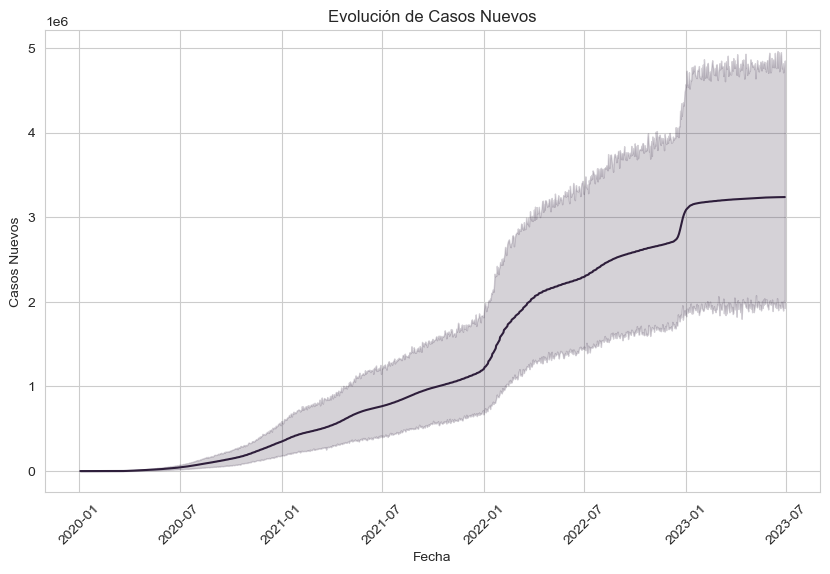

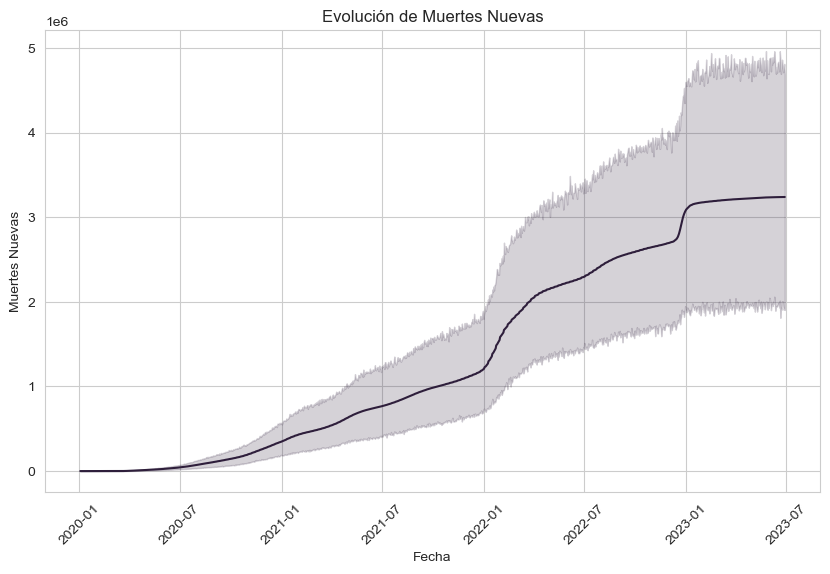

In [58]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Gráfico de casos nuevos
sns.lineplot(x='FECHA_INFORMADA', y='CASOS_ACUM', data=coviddaily)
plt.xlabel('Fecha')  # Etiqueta del eje x
plt.ylabel('Casos Nuevos')  # Etiqueta del eje y
plt.title('Evolución de Casos Nuevos')  # Título del gráfico
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para una mejor legibilidad
plt.grid(True)  # Muestra la cuadrícula
plt.show()  # Muestra el gráfico

plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Gráfico de muertes nuevas
sns.lineplot(x='FECHA_INFORMADA', y='CASOS_ACUM', data=coviddaily)
plt.xlabel('Fecha')  # Etiqueta del eje x
plt.ylabel('Muertes Nuevas')  # Etiqueta del eje y
plt.title('Evolución de Muertes Nuevas')  # Título del gráfico
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para una mejor legibilidad
plt.grid(True)  # Muestra la cuadrícula
plt.show()  # Muestra el gráfico

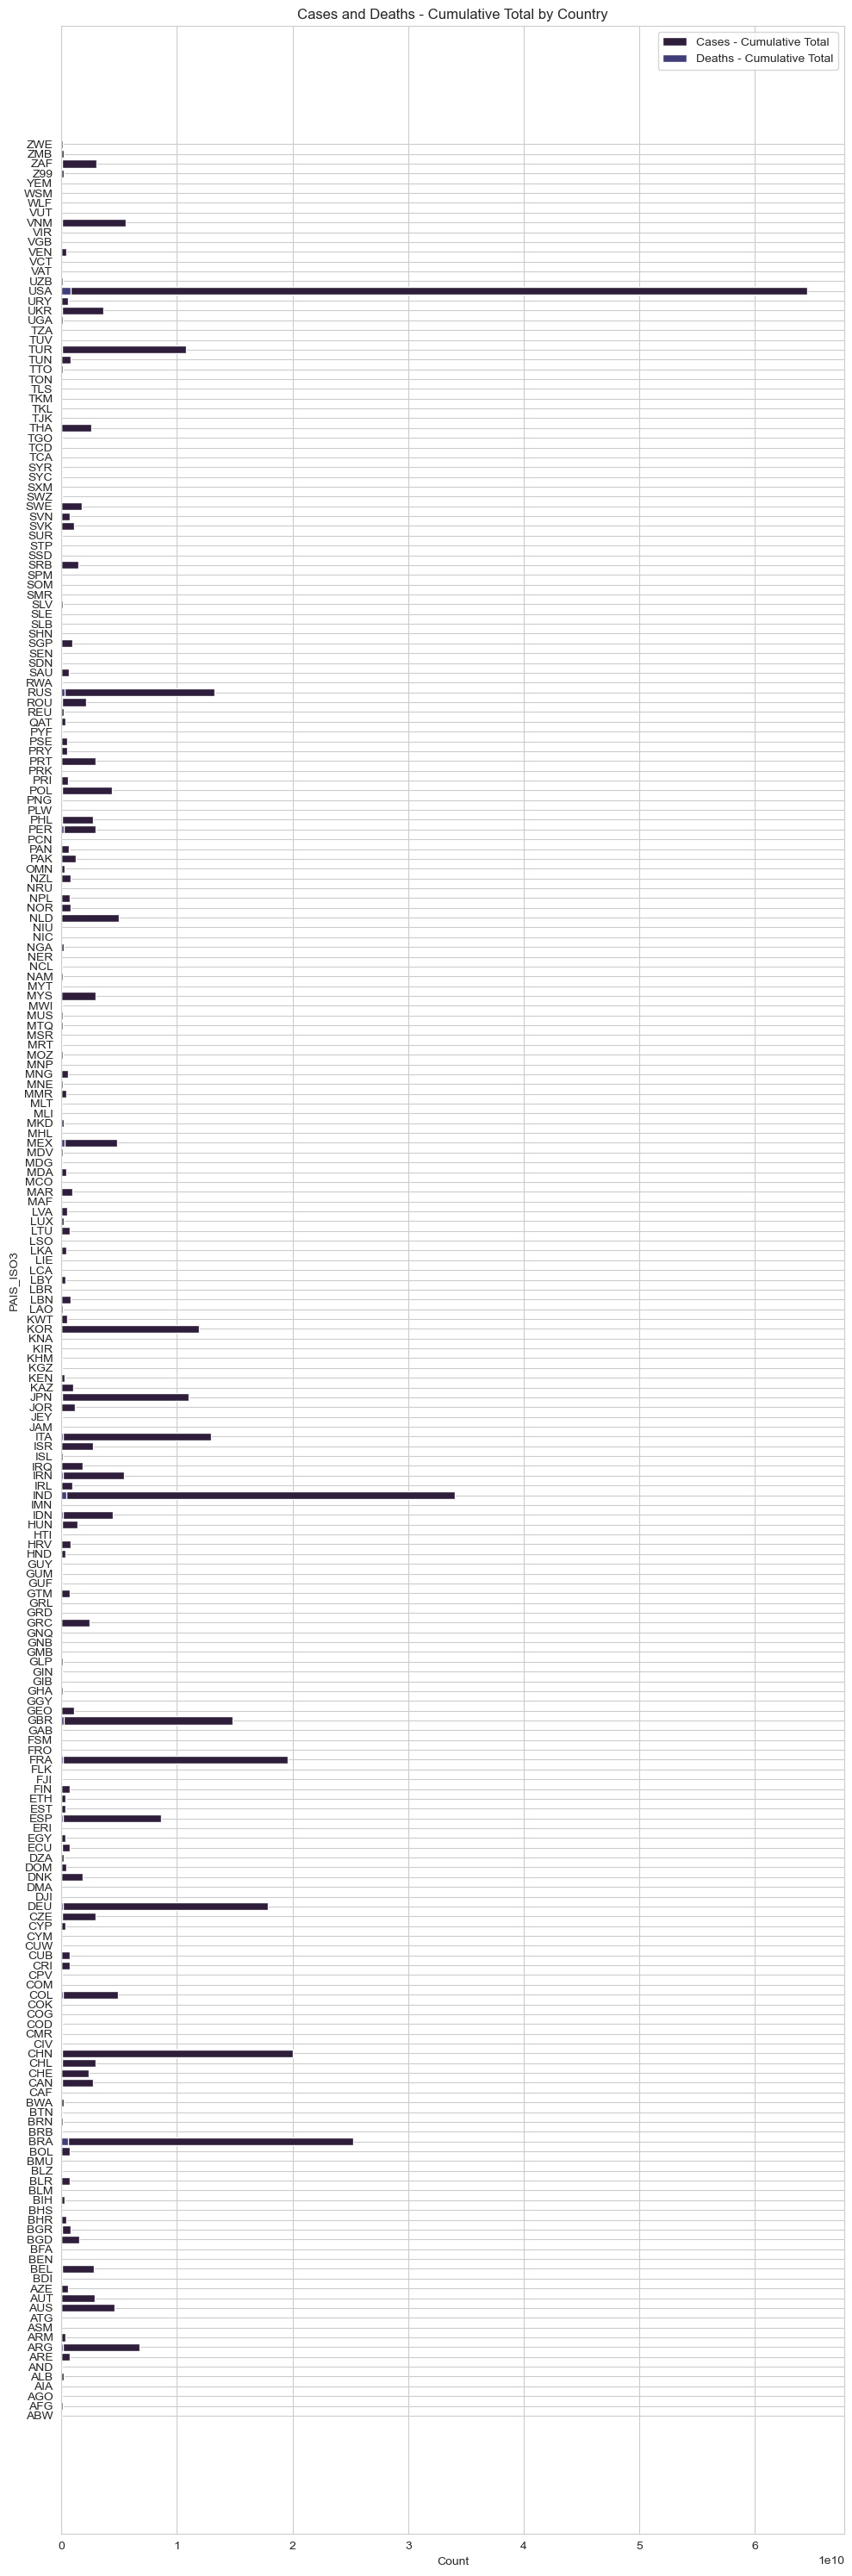

In [59]:
# Agrupar los datos por país y calcular la suma de casos y muertes acumulados
grouped = coviddaily.groupby('PAIS_ISO3').agg({'CASOS_ACUM': 'sum', 'MUERTES_ACUM': 'sum'})

# Obtener los nombres de los países y los valores de casos y muertes acumulados
paises = grouped.index
cases = grouped['CASOS_ACUM']
deaths = grouped['MUERTES_ACUM']

# Configurar el tamaño de la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 30))

# Crear el gráfico de barras horizontales para casos acumulados
ax.barh(paises, cases, label='Cases - Cumulative Total')

# Crear el gráfico de barras horizontales para muertes acumuladas
ax.barh(paises, deaths, label='Deaths - Cumulative Total')

# Configurar las etiquetas de los ejes y el título del gráfico
ax.set_xlabel('Count')
ax.set_ylabel('PAIS_ISO3')
ax.set_title('Cases and Deaths - Cumulative Total by Country')

# Mostrar una leyenda
ax.legend()

# Ajustar el espacio entre las barras
plt.tight_layout()

# Mostrar el gráfico de barras
plt.show()

In [114]:
coviddaily

,PAIS,PAIS_ISO3,PAIS_ISO2,FECHA_INFORMADA,OMS_REGION,CASOS_NUEVOS,CASOS_ACUM,MUERTES_NUEVAS,MUERTES_ACUM,DIA_DEL_AÑO,MES,AÑO
0,Afghanistan,AFG,AF,2020-01-03,EMRO,0,0,0,0,3,1,2020
1273,Albania,ALB,AL,2020-01-03,EURO,0,0,0,0,3,1,2020
2546,Algeria,DZA,DZ,2020-01-03,AFRO,0,0,0,0,3,1,2020
3819,American Samoa,ASM,AS,2020-01-03,WPRO,0,0,0,0,3,1,2020
5092,Andorra,AND,AD,2020-01-03,EURO,0,0,0,0,3,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
296608,Vietnam,VNM,VN,2023-06-28,WPRO,0,11620076,0,43206,179,6,2023
297881,Wallis and Futuna,WLF,WF,2023-06-28,WPRO,0,3550,0,8,179,6,2023
299154,Yemen,YEM,YE,2023-06-28,EMRO,0,11945,0,2159,179,6,2023
300427,Zambia,ZMB,ZM,2023-06-28,AFRO,0,347022,0,4062,179,6,2023


Para calcular la correlación entre país y casos acumulados usaríamos el coeficiente de correlación de Spearman

In [119]:
# Calcular el coeficiente de correlación de Spearman
correlacion_spearman, p_valor = stats.spearmanr(coviddaily['PAIS'], coviddaily['CASOS_ACUM'])

# Imprimir el coeficiente de correlación y el valor p
print('Coeficiente de correlación de Spearman:', correlacion_spearman)
print('Valor p:', p_valor)

Coeficiente de correlación de Spearman: -0.05202680413632658
Valor p: 7.49643620172126e-180


La correlación de Spearman mide la relación monotónica entre dos variables. En este caso, el coeficiente de correlación de -0.052 indica una correlación débil y negativa entre la variable categórica (PAIS) y la variable numérica (CASOS_ACUM). Esto sugiere que no hay una relación lineal clara entre el país y el número acumulado de casos de COVID-19.

El valor p extremadamente bajo (7.496e-180) indica una fuerte evidencia en contra de la hipótesis nula de no correlación. En otras palabras, es altamente improbable que la correlación observada se deba al azar. Sin embargo, debido a que la correlación es muy cercana a cero, su relevancia práctica puede ser limitada.

#### Covid Daily US

Estos datos son similares a los anteriores sólo que en detalle de Estados Unidos

In [60]:
coviddaily_us = pd.read_csv("C:/Users/Patricia/Desktop/Github/TFM/DF Covid/df_daily_report_us_final.csv")

In [61]:
coviddaily_us

,Unnamed: 0,Province_State,Confirmed,Deaths,Recovered,Active,ISO3,Date
0,0,Alabama,365747,4872,202137.0,158738.0,USA,01.01.2021
1,1,Alaska,47019,206,7165.0,39648.0,USA,01.01.2021
2,2,American Samoa,0,0,NaN,NaN,ASM,01.01.2021
3,3,Arizona,530267,9015,76934.0,444318.0,USA,01.01.2021
4,4,Arkansas,229442,3711,199247.0,26484.0,USA,01.01.2021
...,...,...,...,...,...,...,...,...
61609,61609,Virginia,2199302,22670,NaN,NaN,USA,NaN
61610,61610,Washington,1883676,15038,NaN,NaN,USA,NaN
61611,61611,West Virginia,624721,7672,NaN,NaN,USA,NaN
61612,61612,Wisconsin,1960878,15802,NaN,NaN,USA,NaN


In [62]:
coviddaily_us['Date'] = pd.to_datetime(coviddaily_us['Date'], format='%d.%m.%Y')
coviddaily_us['DIA_DEL_AÑO'] = coviddaily_us['Date'].dt.dayofyear
coviddaily_us['MES'] = coviddaily_us['Date'].dt.month
coviddaily_us['AÑO'] = coviddaily_us['Date'].dt.year

coviddaily_us.sort_values(['AÑO', 'DIA_DEL_AÑO'], inplace=True)

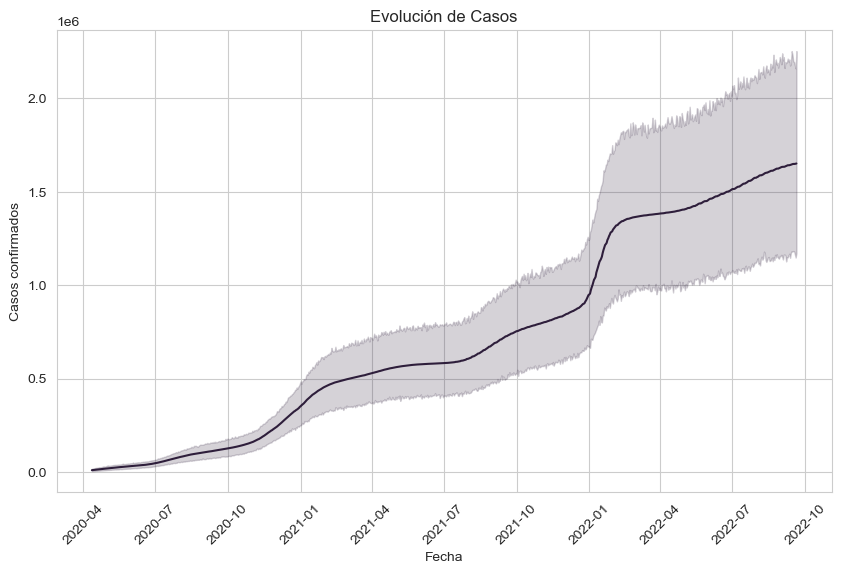

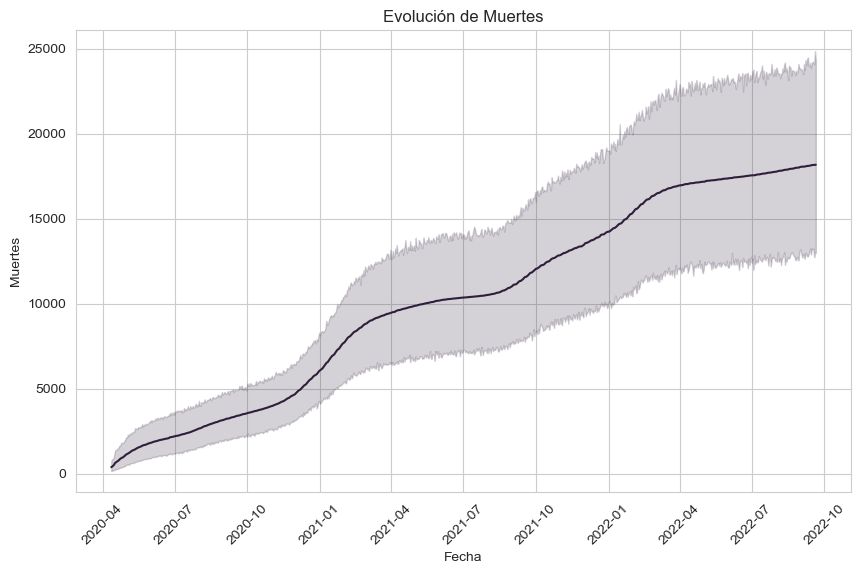

In [63]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Gráfico de casos nuevos
sns.lineplot(x='Date', y='Confirmed', data=coviddaily_us)
plt.xlabel('Fecha')  # Etiqueta del eje x
plt.ylabel('Casos confirmados')  # Etiqueta del eje y
plt.title('Evolución de Casos')  # Título del gráfico
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para una mejor legibilidad
plt.grid(True)  # Muestra la cuadrícula
plt.show()  # Muestra el gráfico

plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Gráfico de muertes nuevas
sns.lineplot(x='Date', y='Deaths', data=coviddaily_us)
plt.xlabel('Fecha')  # Etiqueta del eje x
plt.ylabel('Muertes')  # Etiqueta del eje y
plt.title('Evolución de Muertes')  # Título del gráfico
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para una mejor legibilidad
plt.grid(True)  # Muestra la cuadrícula
plt.show()  # Muestra el gráfico

## Datos  UCI

In [64]:
uci_hosp = pd.read_csv("C:/Users/Patricia/Desktop/Github/TFM/DF Covid/df_daily_report_us_final.csv")

In [65]:
uci_hosp

,Unnamed: 0,Province_State,Confirmed,Deaths,Recovered,Active,ISO3,Date
0,0,Alabama,365747,4872,202137.0,158738.0,USA,01.01.2021
1,1,Alaska,47019,206,7165.0,39648.0,USA,01.01.2021
2,2,American Samoa,0,0,NaN,NaN,ASM,01.01.2021
3,3,Arizona,530267,9015,76934.0,444318.0,USA,01.01.2021
4,4,Arkansas,229442,3711,199247.0,26484.0,USA,01.01.2021
...,...,...,...,...,...,...,...,...
61609,61609,Virginia,2199302,22670,NaN,NaN,USA,NaN
61610,61610,Washington,1883676,15038,NaN,NaN,USA,NaN
61611,61611,West Virginia,624721,7672,NaN,NaN,USA,NaN
61612,61612,Wisconsin,1960878,15802,NaN,NaN,USA,NaN


In [66]:
uci_hosp.isna().sum()

Unnamed: 0            0
Province_State        0
Confirmed             0
Deaths                0
Recovered         46492
Active            46492
ISO3                  0
Date               9860
dtype: int64

No contamos con la columna Recovered pero deberían ser aquellos casos confirmados que no han fallecido

In [67]:
# Reemplazar los NaN en "Recovered" con los valores de "Confirmed" que no figuran como "Deaths"
uci_hosp['Recovered'] = uci_hosp['Recovered'].fillna(uci_hosp['Confirmed'] - uci_hosp['Deaths'])

In [68]:
# Convertir la columna "Date" a tipo de datos datetime
uci_hosp['Date'] = pd.to_datetime(uci_hosp['Date'], format='%d.%m.%Y')

Eliminamos aquellos sin fecha pues no son registros que podamos situar

In [69]:
uci_hosp.dropna(subset=['Date'], inplace=True)

In [70]:
uci_hosp['DIA_DEL_AÑO'] = uci_hosp['Date'].dt.dayofyear
uci_hosp['MES'] = uci_hosp['Date'].dt.month
uci_hosp['AÑO'] = uci_hosp['Date'].dt.year

uci_hosp.sort_values(['AÑO', 'DIA_DEL_AÑO'], inplace=True)

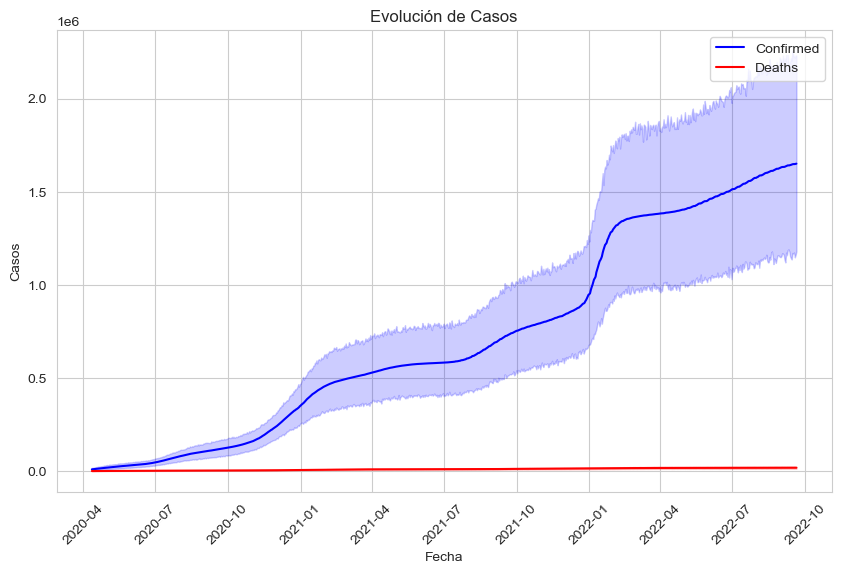

In [71]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Gráfico de casos 
sns.lineplot(x='Date', y='Confirmed', data=uci_hosp, color='blue', label='Confirmed')
sns.lineplot(x='Date', y='Deaths', data=uci_hosp, color='red', label='Deaths')

plt.xlabel('Fecha')  # Etiqueta del eje x
plt.ylabel('Casos')  # Etiqueta del eje y
plt.title('Evolución de Casos')  # Título del gráfico
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para una mejor legibilidad
plt.grid(True)  # Muestra la cuadrícula
plt.legend()  # Muestra la leyenda con los nombres de las líneas
plt.show()  # Muestra el gráfico

## Testing

In [74]:
testing = pd.read_csv("C:/Users/Patricia/Desktop/Github/TFM/DF Covid/df_testing_covid_eu.csv")

In [76]:
testing

,PAIS_ISO3,ANY_SEMANA,NIVEL,CASOS_NUEVOS,N_TESTS_REALIZADOS,POBLACION,RATIO_TESTS,RATIO_POSITIVO,FUENTES_TESTS
0,AUT,2020-41,national,7487.0,124663.0,8978929,1388.394986,6.005792,TESSy COVID-19
1,AUT,2020-42,national,9898.0,129647.0,8978929,1443.902719,7.634577,TESSy COVID-19
2,AUT,2020-43,national,18262.0,158997.0,8978929,1770.779121,11.485751,TESSy COVID-19
3,AUT,2020-44,national,31613.0,167926.0,8978929,1870.223052,18.825554,TESSy COVID-19
4,AUT,2020-45,national,44772.0,199567.0,8978929,2222.614746,22.434571,TESSy COVID-19
...,...,...,...,...,...,...,...,...,...
4379,SWE,2023-21,national,613.0,5442.0,10452326,52.064966,11.264241,TESSy COVID-19
4380,SWE,2023-22,national,518.0,4996.0,10452326,47.797973,10.368295,TESSy COVID-19
4381,SWE,2023-23,national,480.0,4533.0,10452326,43.368337,10.589014,TESSy COVID-19
4382,SWE,2023-24,national,437.0,4566.0,10452326,43.684057,9.570740,TESSy COVID-19


In [77]:
# Corr por defecto será Pearson que es el más utilizado
print("Coeficiente de correlación de Pearson:", testing['RATIO_TESTS'].corr(testing['RATIO_POSITIVO']))

Coeficiente de correlación de Pearson: -0.18767002912753783


Por tanto hablaríamos de una correlación negativa debil entre testing_rate y positivity_rate

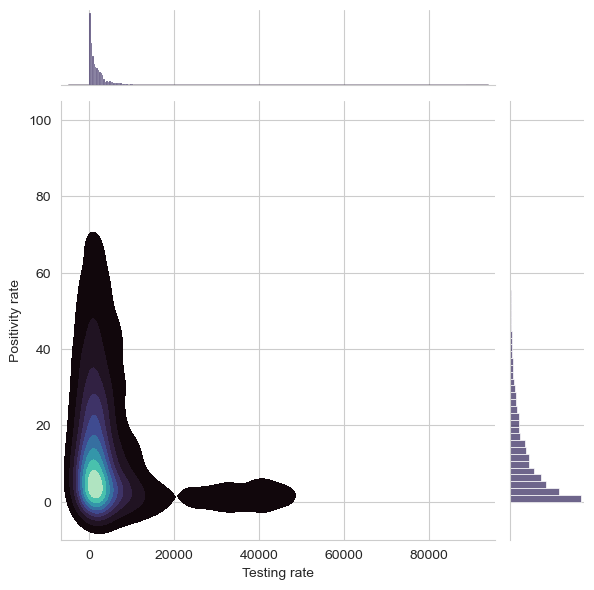

In [83]:
# Jointgrid con histograma marginal Testing_rate x positivity_rate
g = sns.jointplot(data=testing, x='RATIO_TESTS', y='RATIO_POSITIVO', kind="kde", cmap="flare", fill=True)
g.plot_joint(sns.kdeplot, cmap="mako", fill=True)
g.plot_marginals(sns.histplot, color='#3D3164')

# Configurar etiquetes i títol
g.set_axis_labels("Testing rate", "Positivity rate")

plt.show()

#### Conteo de representación de regiones

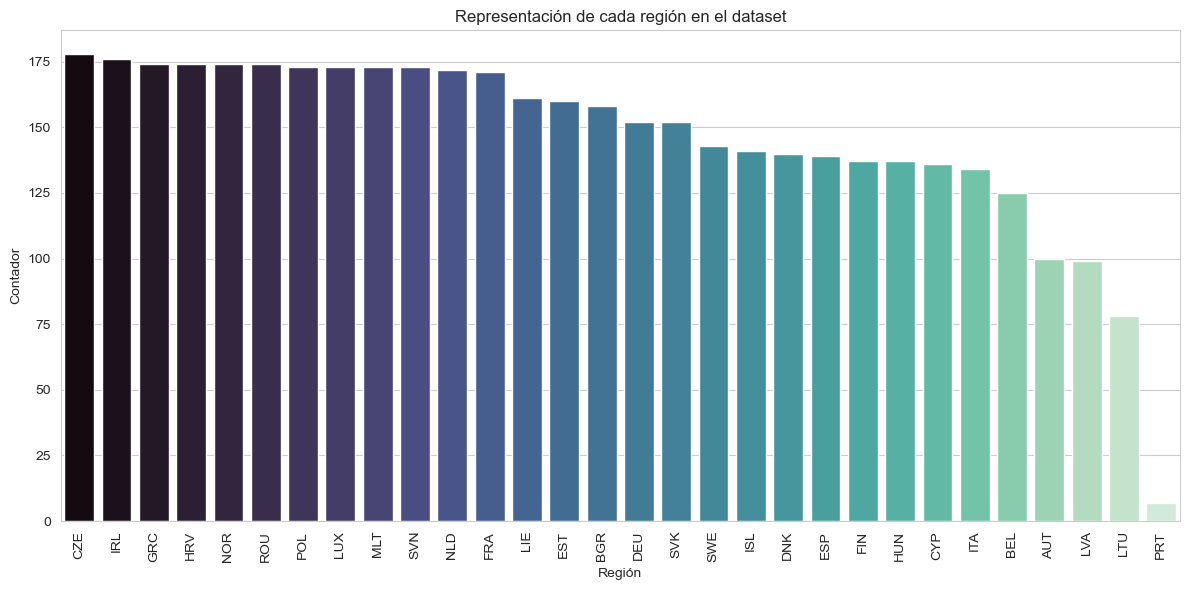

In [80]:
# Calcular el conteo de registros por región
region_counts = testing['PAIS_ISO3'].value_counts()

# Crear la visualización del conteo de registros por región
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
sns.countplot(data=testing, x='PAIS_ISO3', palette='mako', order=region_counts.index)
plt.xlabel('Región')
plt.ylabel('Contador')
plt.title('Representación de cada región en el dataset')
plt.xticks(rotation=90)  # Rotar las etiquetas de las regiones
plt.tight_layout()  # Ajustar el espaciado
plt.show()

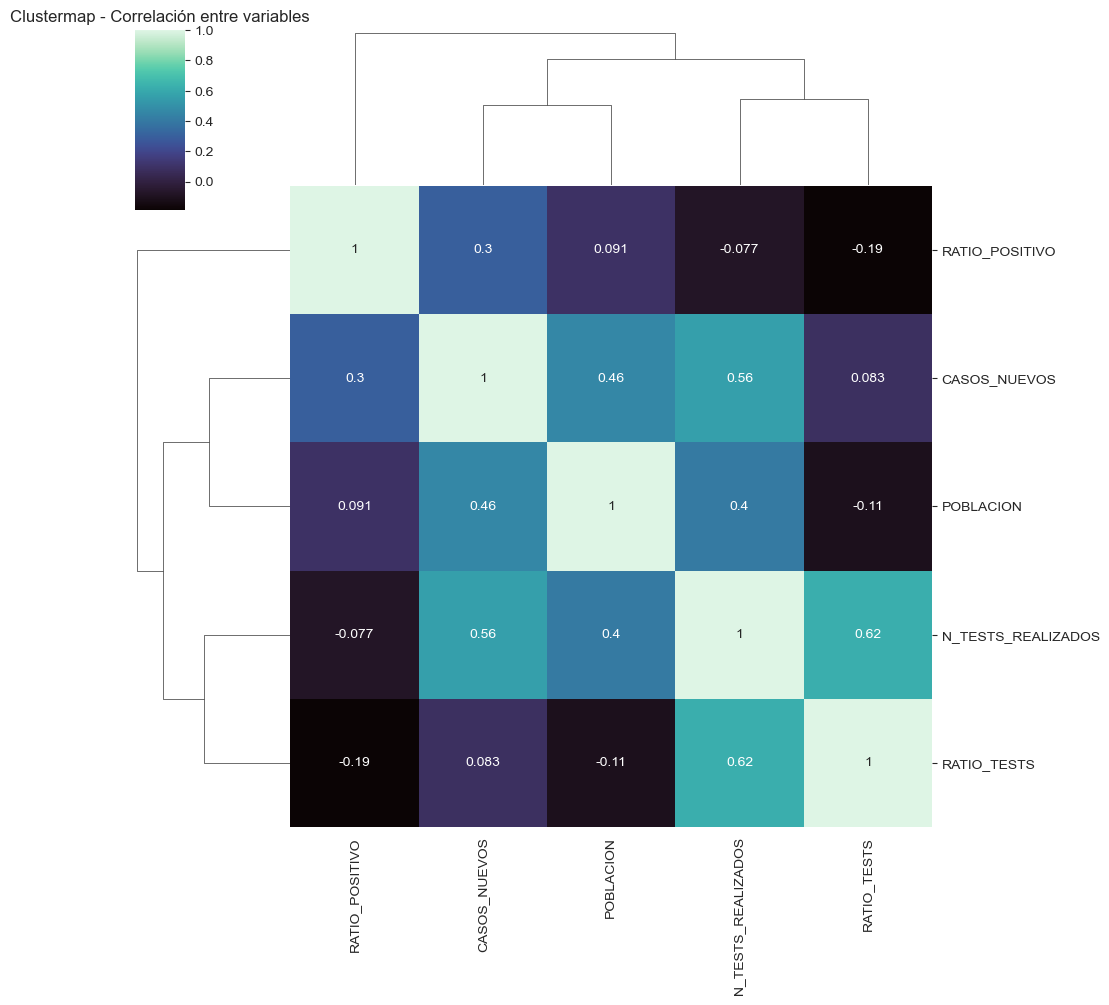

In [82]:
data = testing[['CASOS_NUEVOS','N_TESTS_REALIZADOS', 'POBLACION', 'RATIO_TESTS', 'RATIO_POSITIVO']]
sns.clustermap(data.corr(), annot=True, cmap='mako')
plt.title('Clustermap - Correlación entre variables')
plt.show()

## Cases and deaths

In [85]:
casesanddeath =  pd.read_csv("C:/Users/Patricia/Desktop/Github/TFM/DF Covid/df_Latest reported counts of cases and deaths.csv")

In [86]:
casesanddeath

,PAIS_ISO3,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,USA,Americas,103436829,31249.547,0,0.000,0,1127152,340.527,0,0.000,0
1,CHN,Western Pacific,99289096,6748.452,3650,0.248,0,121465,8.256,74,0.005,0
2,IND,South-East Asia,44994097,3260.431,426,0.031,98,531905,38.544,7,0.001,2
3,FRA,Europe,38989382,59947.365,0,0.000,0,167923,258.187,0,0.000,0
4,DEU,Europe,38431910,46210.689,0,0.000,0,174555,209.886,0,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
231,VAT,Europe,26,3213.844,0,0.000,0,0,0.000,0,0.000,0
232,TKL,Western Pacific,19,1407.407,0,0.000,0,0,0.000,0,0.000,0
233,PCN,Western Pacific,4,8000.000,0,0.000,0,0,0.000,0,0.000,0
234,PRK,South-East Asia,0,0.000,0,0.000,0,0,0.000,0,0.000,0


## Vaccination

In [87]:
vacc =  pd.read_csv("C:/Users/Patricia/Desktop/Github/TFM/DF Covid/df_vacunation.csv")

In [88]:
vacc

,PAIS,PAIS_ISO3,CONTINENTE,ISO_CONTINENTE,OMS_REGION,FUENTE_DATOS,FECHA_ULT_ACTUALIZACION,TOTAL_VACUNACION_ACUM,NPER_VACUNADAS_1DOSIS,TOTAL_VACUNACION_PER100,NPER_VACUNADAS_1DOSIS_PER100,NPER_VACUNADAS_DOSIS_FULL,NPER_VACUNADAS_DOSIS_FULL_PER100,FECHA_PRIMERA_VACUNA,N_TIPOS_VACUNAS_USADAS,NPER_CON_DOSIS_ADICIONAL,NPER_CON_DOSIS_ADIDICIONAL_PER100
0,Albania,ALB,Europe,EU,EURO,REPORTING,14-05-2023,3080679.0,1348396,107.000,47.379,1277987,44.905,13-01-2021,6.0,399190.0,14.027
1,Chile,CHL,South America,SA,AMRO,REPORTING,02-06-2023,66273384.0,18106832,346.687,94.720,17716364,92.677,21-12-2020,5.0,15766986.0,82.480
2,Congo,COG,Africa,AF,AFRO,REPORTING,31-07-2022,833210.0,695760,15.100,12.609,654119,11.854,23-03-2021,4.0,0.0,0.000
3,Côte d’Ivoire,CIV,Africa,AF,AFRO,REPORTING,19-02-2023,25263932.0,13568372,95.776,51.438,12164304,46.115,01-03-2021,5.0,3138712.0,11.899
4,Denmark,DNK,Europe,EU,EURO,REPORTING,11-06-2023,14986863.0,4767119,257.400,81.870,4731911,81.266,16-12-2020,5.0,3634971.0,62.427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,"Saint Helena, Ascension and Tristan da Cunha",SHN,Africa,AF,AFRO,OWID,05-05-2021,7892.0,4361,129.995,71.833,3531,58.162,0,1.0,0.0,0.000
225,Saint Lucia,LCA,North America,NaN,AMRO,REPORTING,02-06-2023,122977.0,60140,66.971,32.751,54971,29.936,17-02-2021,5.0,7866.0,4.284
226,Serbia,SRB,Europe,EU,EURO,REPORTING,05-03-2023,6722671.0,3398116,97.100,49.058,3324555,47.996,23-12-2020,5.0,0.0,0.000
227,Sweden,SWE,Europe,EU,EURO,REPORTING,11-06-2023,23226250.0,7470582,224.900,72.336,7332983,71.004,23-12-2020,5.0,5541390.0,53.656


## Vaccines type

In [89]:
vacctype =  pd.read_csv("C:/Users/Patricia/Desktop/Github/TFM/DF Covid/df_vacunation_tipo.csv")

In [90]:
vacctype

,PAIS_ISO3,CONTINENTE,ISO_continente,NOMBRE_VACUNA,NOMBRE_TIPO_VACUNA,NOMBRE_COMPAÑIA,FECHA_AUTORIZACION,FECHA_INICIO_VACUNACION,FUENTE_DATOS
0,SHN,Africa,AF,AstraZeneca - AZD1222,AZD1222,AstraZeneca,0,0,OWID
1,GRL,North America,NaN,Moderna - mRNA-1273,mRNA-1273,Moderna,0,0,OWID
2,FRO,Europe,EU,Moderna - mRNA-1273,mRNA-1273,Moderna,0,0,OWID
3,FRO,Europe,EU,Pfizer BioNTech - Comirnaty,Comirnaty,Pfizer BioNTech,0,0,OWID
4,BIH,Europe,EU,AstraZeneca - AZD1222,AZD1222,AstraZeneca,0,0,OWID
...,...,...,...,...,...,...,...,...,...
1095,CZE,Europe,EU,Pfizer BioNTech - Comirnaty Bivalent Original/...,Comirnaty Bivalent Original/Omicron BA.4/BA.5,0,0,05-10-2022,REPORTING
1096,DEU,Europe,EU,Moderna – Spikevax Bivalent Original/Omicron ...,Moderna – Spikevax Bivalent Original/Omicron ...,0,0,14-09-2022,REPORTING
1097,SVN,Europe,EU,Moderna – Spikevax Bivalent Original/Omicron ...,Moderna – Spikevax Bivalent Original/Omicron ...,0,0,21-12-2022,REPORTING
1098,DEU,Europe,EU,Pfizer BioNTech - Comirnaty Bivalent Original/...,Pfizer BioNTech - Comirnaty Bivalent Original/...,0,0,07-09-2022,REPORTING


In [94]:
vacctype['NOMBRE_VACUNA'].nunique()

38

Vemos que el dataset recoge 38 vacunas diferentes

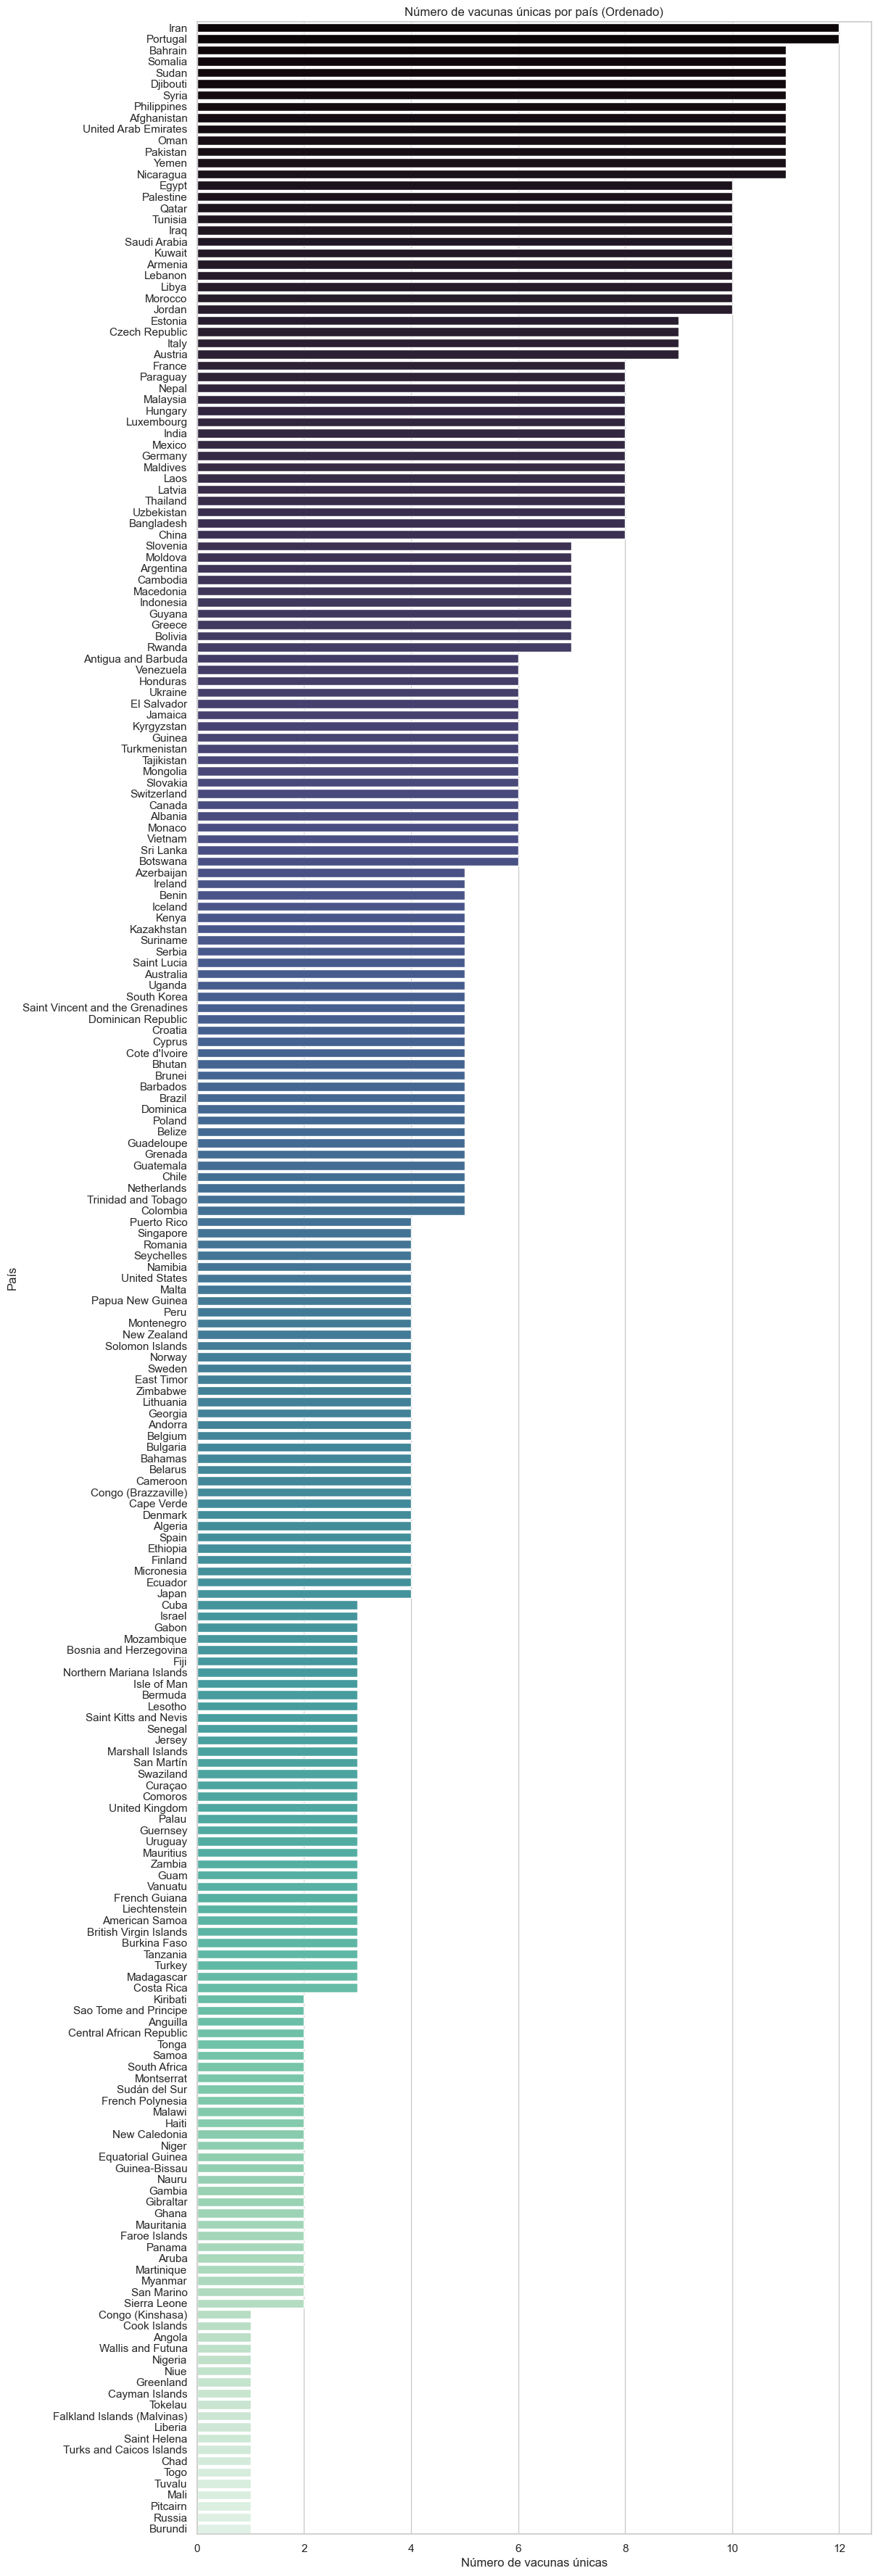

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt


# Contar el número de vacunas autorizadas y reordenar el dataset
vacunas_por_pais = vacctype.groupby('PAIS_ISO3')['NOMBRE_VACUNA'].nunique().reset_index().sort_values(by='NOMBRE_VACUNA', ascending=False)

# Realizar merge con el dataframe de países para obtener el nombre completo del país
vacunas_por_pais = vacunas_por_pais.merge(paises[['PAIS_ISO3', 'PAIS_NOM']], left_on='PAIS_ISO3', right_on='PAIS_ISO3', how='left')

# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras horizontales con paleta 'mako'
plt.figure(figsize=(12, 45))
sns.barplot(data=vacunas_por_pais, x='NOMBRE_VACUNA', y='PAIS_NOM', palette='mako')
plt.xlabel('Número de vacunas aprobadas')
plt.ylabel('País')
plt.title('Número de vacunas aprobadas por país')
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()

Podemos ver que los países que figuran con más vacunas aprobadas son Iran, Portugal, Bahrain, Somalia y Sudán

Los países con menor cantidad de vacunas aprobadas son Burundi, Rusia, Islas Pitcairn, Mali y Tuvalu que habrían aprobado sólo una

# Análisis integrado

## Hipótesis

**Hipótesis de investigación (H1)**: Los países en los que hace más frío tienen una mayor incidencia de Covid-19
**Hipótesis nula (H01)**: No hay relación entre la temperatura promedio de un país y la incidencia de Covid-19.

**Hipótesis de investigación (H2)**: En la época más fría del año aumentan los casos de Covid-19
**Hipótesis nula (H02)**: No hay diferencia en la cantidad de casos de Covid-19 entre la época más fría y otras estaciones del año.

**Hipótesis de investigación (H3)**: Hay mayor mortalidad por Covid-19 en países sin salud universal
**Hipótesis nula (H03)**: No hay diferencia en la tasa de mortalidad por Covid-19 entre países con y sin salud universal.

**Hipótesis de investigación (H4)**: En las zonas urbanas hay mayor incidencia de Covid-19
**Hipótesis nula (H04)**: No hay diferencia en la incidencia de Covid-19 entre zonas urbanas y zonas no urbanas.

**Hipótesis de investigación (H5)**: El acceso a las medidas higiénicas afecta directamente en la transmisión de Covid-19
**Hipótesis nula (H05)**: No hay relación entre el acceso a las medidas higiénicas y la transmisión de Covid-19.

Estas hipótesis nos permiten formular suposiciones basadas en las relaciones esperadas entre variables relevantes y la incidencia, propagación y consecuencias del Covid-19. Las hipótesis nulas representan la ausencia de dichas relaciones. A través de análisis de datos y pruebas estadísticas, podremos evaluar la evidencia en apoyo o en contra de estas hipótesis, lo que contribuirá a nuestra comprensión y conocimiento sobre la pandemia de Covid-19.

Es importante destacar que las hipótesis deben ser probadas y evaluadas de manera rigurosa, utilizando métodos adecuados de análisis estadístico y teniendo en cuenta otros factores que puedan influir en los resultados, así mismo serán respaldadas las afirmaciones con bibliografía académica especializada.

In [ ]:
Los países en los que hace frío tienen una mayor incidencia de Covid

In [ ]:
# Unir los datasets por país utilizando el código ISO del país
merged_df = pd.merge(vacc, casesanddeath, on='PAIS_ISO3')

# Calcular la proporción de vacunados y la tasa de casos por cada 100.000 habitantes
merged_df['Proporcion_Vacunados'] = merged_df['Vacunados'] / merged_df['Poblacion_Total']
merged_df['Tasa_Casos'] = merged_df['TOTAL_VACUNACION_ACUM'] / merged_df['Poblacion_Total'] * 100000

# Ordenar el dataframe por la tasa de casos
merged_df.sort_values('Tasa_Casos', inplace=True)

# Crear el gráfico de barras para comparar la proporción de vacunados y la tasa de casos
plt.figure(figsize=(10, 6))
plt.barh(merged_df['PAIS_ISO3'], merged_df['Cases - cumulative total'], label='Proporción de Vacunados')
plt.barh(merged_df['PAIS_ISO3'], merged_df['Tasa_Casos'], label='Tasa de Casos (por 100.000 habitantes)')
plt.xlabel('Valor')
plt.ylabel('PAIS_ISO3')
plt.title('Impacto de la Vacunación por País')
plt.legend()
plt.show()